In [1]:
import numpy as np
from PIL import Image


shape = 32

train_path = "dataset/train.csv"
val_path = "dataset/val.csv"
test_path = "dataset/test.csv"
resize_to = (shape, shape)
x_train = []
x_validation = []
x_test = []
y_train = []
y_validation = []
y_test = []

with open(train_path, "r") as f:
    for line in f:
        slip_data = line.strip().split(',')
        image_path = "dataset/" + slip_data[0]
        image = Image.open(image_path)
        image = image.resize(resize_to)
        data = np.asarray(image)
        x_train.append(data)
        y_train.append(slip_data[1])
x_train = np.array(x_train)
y_train = np.array(y_train)

with open(val_path, "r") as f:
    for line in f:
        slip_data = line.strip().split(',')
        image_path = "dataset/" + slip_data[0]
        image = Image.open(image_path)
        image = image.resize(resize_to)  # Resize hình ảnh
        data = np.asarray(image)
        x_validation.append(data)
        y_validation.append(slip_data[1])
x_validation = np.array(x_validation)
y_validation = np.array(y_validation)



with open(test_path, "r") as f:
    for line in f:
        slip_data = line.strip().split(',')
        image_path = "dataset/" + slip_data[0]
        image = Image.open(image_path)
        image = image.resize(resize_to)  # Resize hình ảnh
        data = np.asarray(image)
        if data.shape == (shape, shape, 3):
            x_test.append(data)
            y_test.append(slip_data[1])
        else:
            print(f"Image {image_path} has an unexpected shape: {data.shape}")
x_test = np.array(x_test)
y_test = np.array(y_test)





x_train = x_train.reshape(x_train.shape[0],-1) /255.0
x_validation = x_validation.reshape(x_validation.shape[0],-1) /255.0
x_test = x_test.reshape(x_test.shape[0],-1) /255.0


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, np.max(Y) + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

y_train = y_train.astype(int)
y_train = one_hot(y_train)

y_validation = y_validation.astype(int)
y_validation = one_hot(y_validation)

y_test = y_test.astype(int)
y_test = one_hot(y_test)


print(x_train.shape, y_train.shape)

print(x_validation.shape,y_validation.shape)

print(x_test.shape,y_test.shape)


Image dataset/test/corn/corn997.jpg has an unexpected shape: (32, 32)
(7000, 3072) (7000, 10)
(1000, 3072) (1000, 10)
(1999, 3072) (1999, 10)


epochs: 0 loss train: 12.36121711906209 Accuracy train: 0.10457142857142857 loss val: 12.35871483279517 Accuracy validation:  0.104
epochs: 100 loss train: 10.792168554076376 Accuracy train: 0.21157142857142858 loss val: 11.320183225704245 Accuracy validation:  0.177
epochs: 200 loss train: 9.831598838608981 Accuracy train: 0.2754285714285714 loss val: 10.448453873668102 Accuracy validation:  0.227
epochs: 300 loss train: 9.035089640964095 Accuracy train: 0.3262857142857143 loss val: 9.94643583506903 Accuracy validation:  0.263
epochs: 400 loss train: 8.533118699971608 Accuracy train: 0.3565714285714286 loss val: 9.651525804401814 Accuracy validation:  0.283
epochs: 500 loss train: 8.031088484244577 Accuracy train: 0.3901428571428571 loss val: 9.410869361748896 Accuracy validation:  0.295
epochs: 600 loss train: 7.5213006683288075 Accuracy train: 0.429 loss val: 9.083118753033878 Accuracy validation:  0.316
epochs: 700 loss train: 7.084330876538171 Accuracy train: 0.4595714285714286 lo

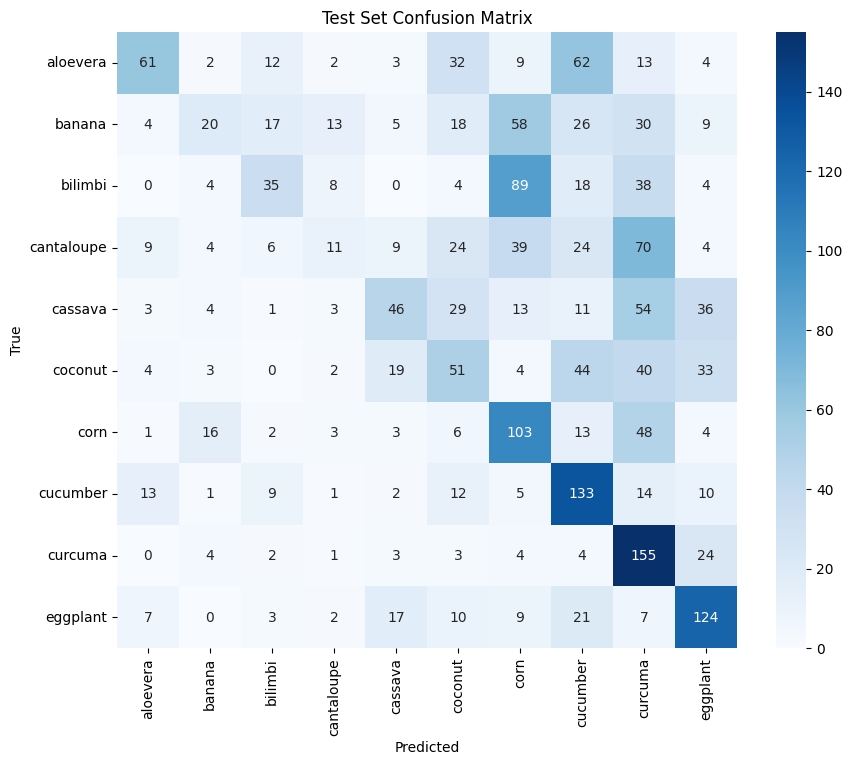

In [2]:
from MLP_autograd import *
nn_model2 = NeuralNetwork(layers_size=[32*32*3,768, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.005)
nn_model2.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn_model2.test(x_test,y_test)

epochs: 0 loss train: 5.655719924056406 Accuracy train: 0.5495714285714286 loss val: 7.877203990170361 Accuracy validation:  0.393
epochs: 100 loss train: 5.151293335748764 Accuracy train: 0.5778571428571428 loss val: 7.630549484622541 Accuracy validation:  0.421
epochs: 200 loss train: 4.689675285386463 Accuracy train: 0.6078571428571429 loss val: 7.4029347611492184 Accuracy validation:  0.432
epochs: 300 loss train: 4.206150377544032 Accuracy train: 0.6388571428571429 loss val: 7.083154778795042 Accuracy validation:  0.447
epochs: 400 loss train: 3.6365291700791267 Accuracy train: 0.673 loss val: 6.786430940563329 Accuracy validation:  0.463
epochs: 500 loss train: 3.080377139304436 Accuracy train: 0.7097142857142857 loss val: 6.48571857680414 Accuracy validation:  0.485
epochs: 600 loss train: 2.506008789691418 Accuracy train: 0.7471428571428571 loss val: 6.194476349970749 Accuracy validation:  0.5
epochs: 700 loss train: 2.092630296644483 Accuracy train: 0.7804285714285715 loss val

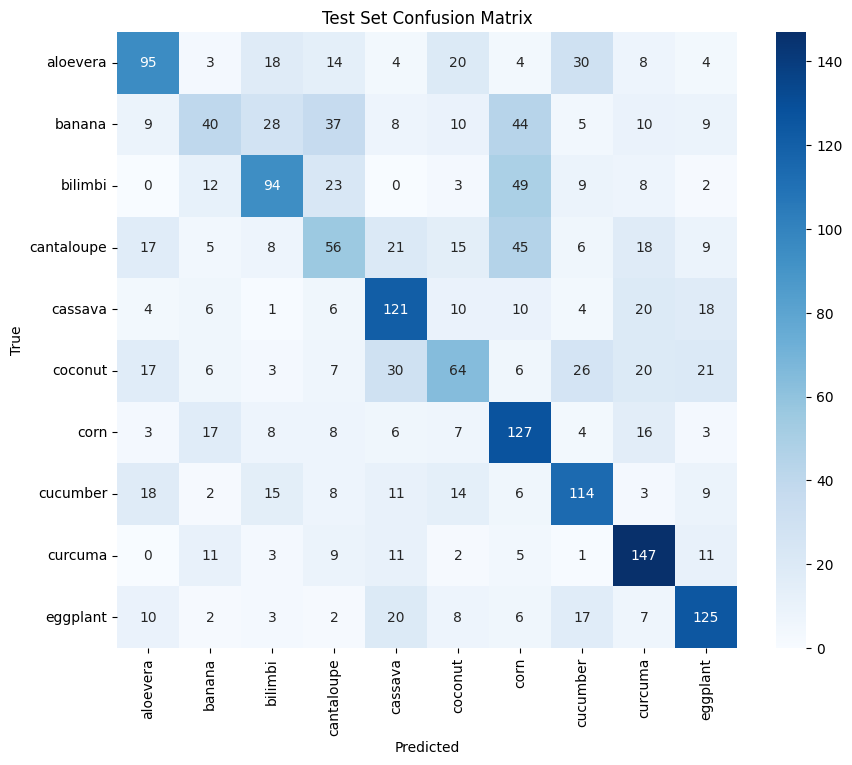

In [3]:
nn_model2.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn_model2.test(x_test,y_test)

epochs: 0 loss train: 0.8801900079321919 Accuracy train: 0.8664285714285714 loss val: 5.393625811086725 Accuracy validation:  0.543
epochs: 100 loss train: 0.5331260829757465 Accuracy train: 0.9047142857142857 loss val: 5.0363670207786475 Accuracy validation:  0.569
epochs: 200 loss train: 0.2518170473470611 Accuracy train: 0.94 loss val: 4.739413241226608 Accuracy validation:  0.603
epochs: 300 loss train: 0.050883613155722034 Accuracy train: 0.985 loss val: 4.532382611759381 Accuracy validation:  0.63
epochs: 400 loss train: 0.008429339870268275 Accuracy train: 0.9994285714285714 loss val: 4.450266350011042 Accuracy validation:  0.639
epochs: 500 loss train: 0.0034903243428052993 Accuracy train: 1.0 loss val: 4.434482238229768 Accuracy validation:  0.638
epochs: 600 loss train: 0.0018122600098887094 Accuracy train: 1.0 loss val: 4.422357890561471 Accuracy validation:  0.642
epochs: 700 loss train: 0.0013388150993803856 Accuracy train: 1.0 loss val: 4.41514649575517 Accuracy validatio

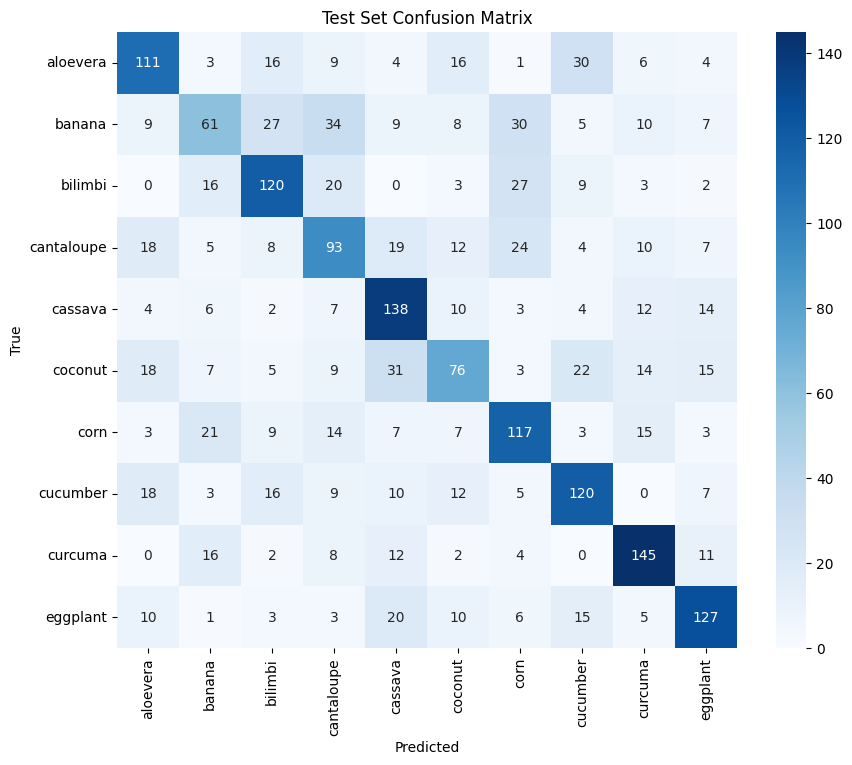

In [4]:
nn_model2.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn_model2.test(x_test,y_test)

epochs: 0 loss train: 0.0008275976206857321 Accuracy train: 1.0 loss val: 4.40304301145739 Accuracy validation:  0.644
epochs: 100 loss train: 0.0007449056069015155 Accuracy train: 1.0 loss val: 4.400292462751294 Accuracy validation:  0.644
epochs: 200 loss train: 0.0006796867886945118 Accuracy train: 1.0 loss val: 4.397934826496861 Accuracy validation:  0.645
epochs: 300 loss train: 0.0006266575616003173 Accuracy train: 1.0 loss val: 4.395818013343583 Accuracy validation:  0.645
epochs: 400 loss train: 0.0005825138891416245 Accuracy train: 1.0 loss val: 4.393993338371189 Accuracy validation:  0.646
epochs: 500 loss train: 0.0005450251820524344 Accuracy train: 1.0 loss val: 4.392301913335308 Accuracy validation:  0.646
epochs: 600 loss train: 0.0005127188123778779 Accuracy train: 1.0 loss val: 4.390751806659455 Accuracy validation:  0.649
epochs: 700 loss train: 0.0004845309068500858 Accuracy train: 1.0 loss val: 4.3893669614805075 Accuracy validation:  0.649
epochs: 800 loss train: 0.

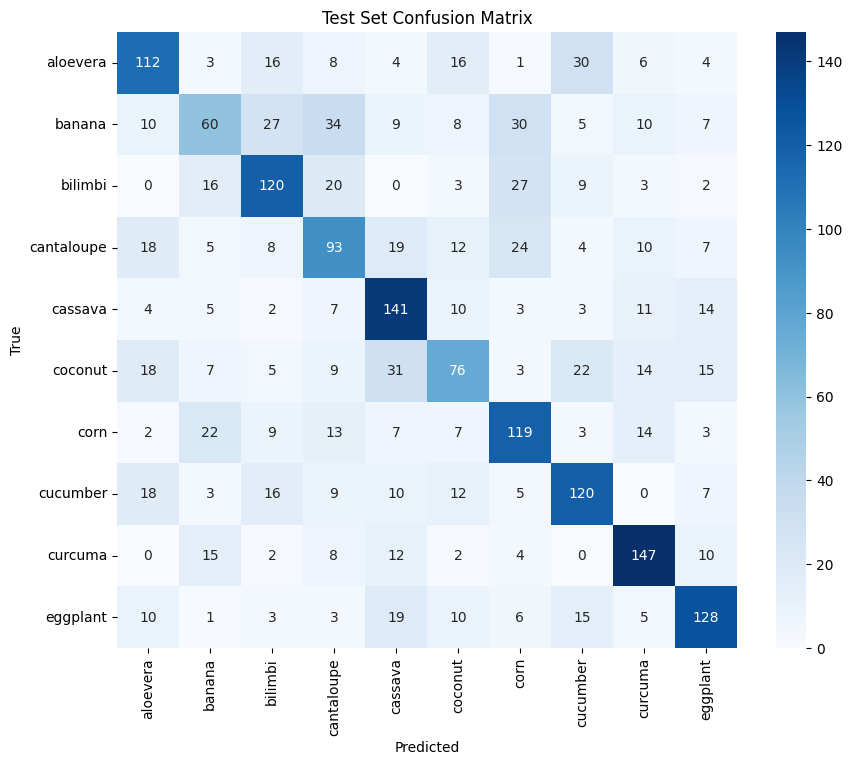

In [26]:
nn_model2.train(x_train, y_train,x_validation, y_validation, epochs=1001,batch_size = 128)
nn_model2.test(x_test,y_test)

In [4]:
import numpy as np
from PIL import Image

num_pic = 20
nn_model2.test(x_test,y_test)
class_dirs = ['aloevera','banana','bilimbi','cantaloupe','cassava','coconut','corn','cucumber','curcuma','eggplant']


y_pred = nn_model2.forward(Tensor(x_test))
y_pred = np.argmax(y_pred.data.T, 0)
y_true = np.argmax(y_test.T, 0)

incorrect_indices = np.where(y_pred != y_true)[0]
if len(incorrect_indices) > 0:
    selected_indices = np.random.choice(incorrect_indices, size=min(num_pic, len(incorrect_indices)), replace=False)

    fig, axes = plt.subplots(4, 5, figsize=(12, 10))
    axes = axes.ravel()
    
    for i in range(num_pic):
        if i < len(selected_indices):
            idx = selected_indices[i]
            
            # Tạo đường dẫn ảnh
            index = idx%200 + 800
            if idx >= 1397:
                index = index + 1
                if index == 1000:
                    index = 800
            image_path = f"dataset/test/{class_dirs[y_true[idx]]}/{class_dirs[y_true[idx]]}{index}.jpg"
            
            try:
                img = Image.open(image_path)
                axes[i].imshow(img)
                axes[i].set_title(f"True: {class_dirs[y_true[idx]]}\nPred: {class_dirs[y_pred[idx]]}")
                axes[i].axis('off')
            except FileNotFoundError:
                print(f"Image not found at path: {image_path}")
                axes[i].axis('off')
        else:
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No incorrect predictions.")

NameError: name 'nn_model2' is not defined

epochs: 0 loss train: 12.439209350866204 Accuracy train: 0.099 loss val: 12.479276347949755 Accuracy validation:  0.096
epochs: 100 loss train: 8.67316318406971 Accuracy train: 0.33385714285714285 loss val: 9.434716571667405 Accuracy validation:  0.279
epochs: 200 loss train: 4.175138022292578 Accuracy train: 0.5045714285714286 loss val: 6.862614520572299 Accuracy validation:  0.353
epochs: 300 loss train: 2.5174222544207905 Accuracy train: 0.6047142857142858 loss val: 5.8355576208330575 Accuracy validation:  0.388
epochs: 400 loss train: 1.7492117150643218 Accuracy train: 0.686 loss val: 5.374269855066315 Accuracy validation:  0.425
epochs: 500 loss train: 1.2720496483156458 Accuracy train: 0.7481428571428571 loss val: 5.030628165528742 Accuracy validation:  0.435
epochs: 600 loss train: 0.9722345342203221 Accuracy train: 0.793 loss val: 4.802637294140819 Accuracy validation:  0.471
epochs: 700 loss train: 0.769934035014466 Accuracy train: 0.8307142857142857 loss val: 4.66475359863053

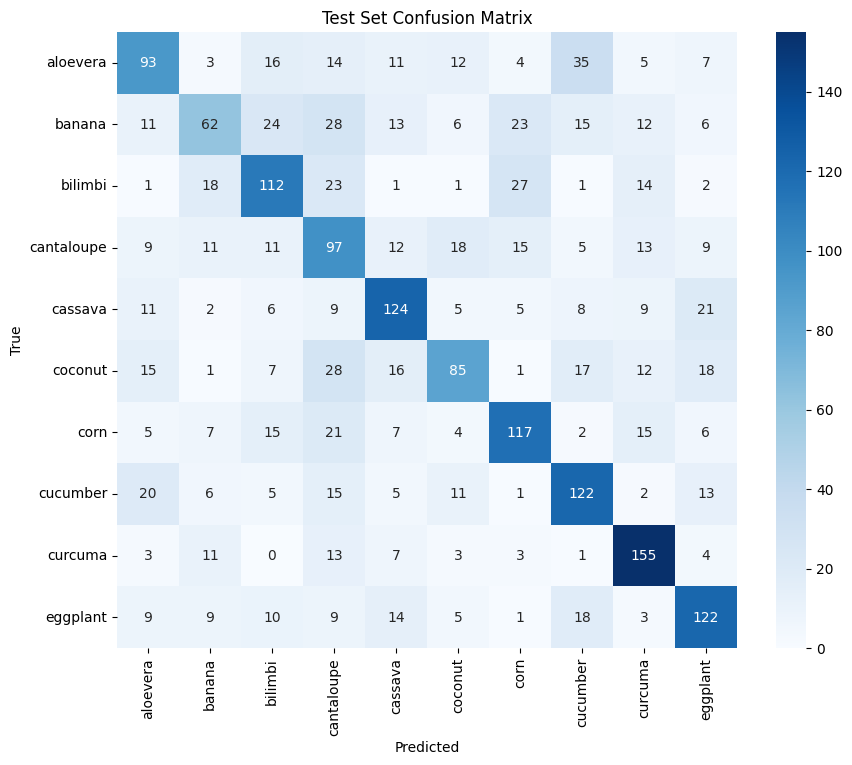

In [2]:
from MLP_autograd import *
nn_model1 = NeuralNetwork(layers_size=[32*32*3,640, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.01)
nn_model1.train(x_train, y_train,x_validation, y_validation, epochs=4001,batch_size = 128)
nn_model1.test(x_test,y_test)

( 4.930412839860558 0.5447723861930965 )


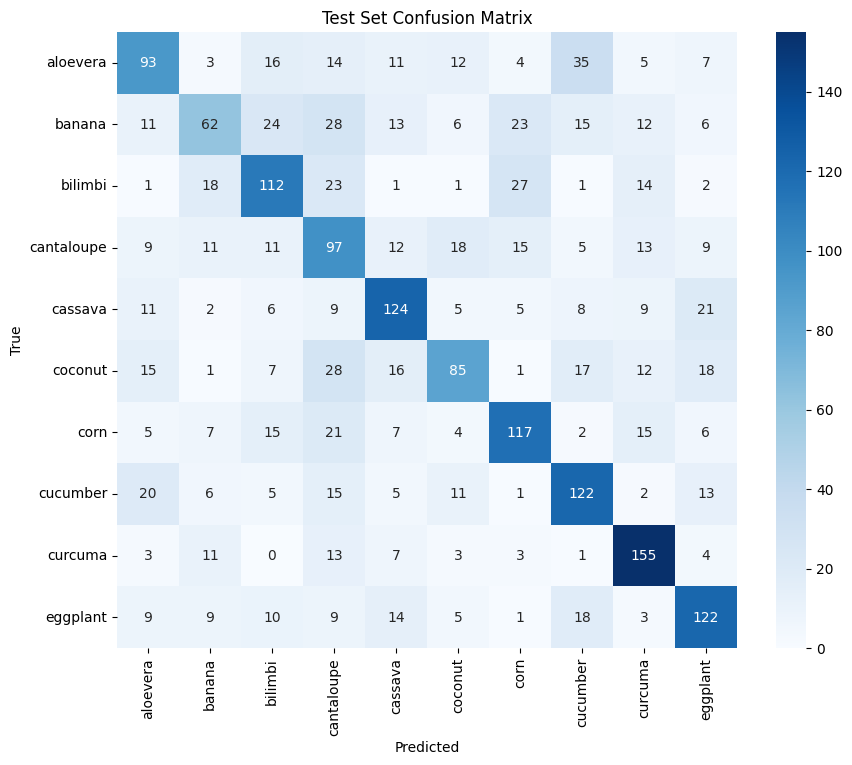

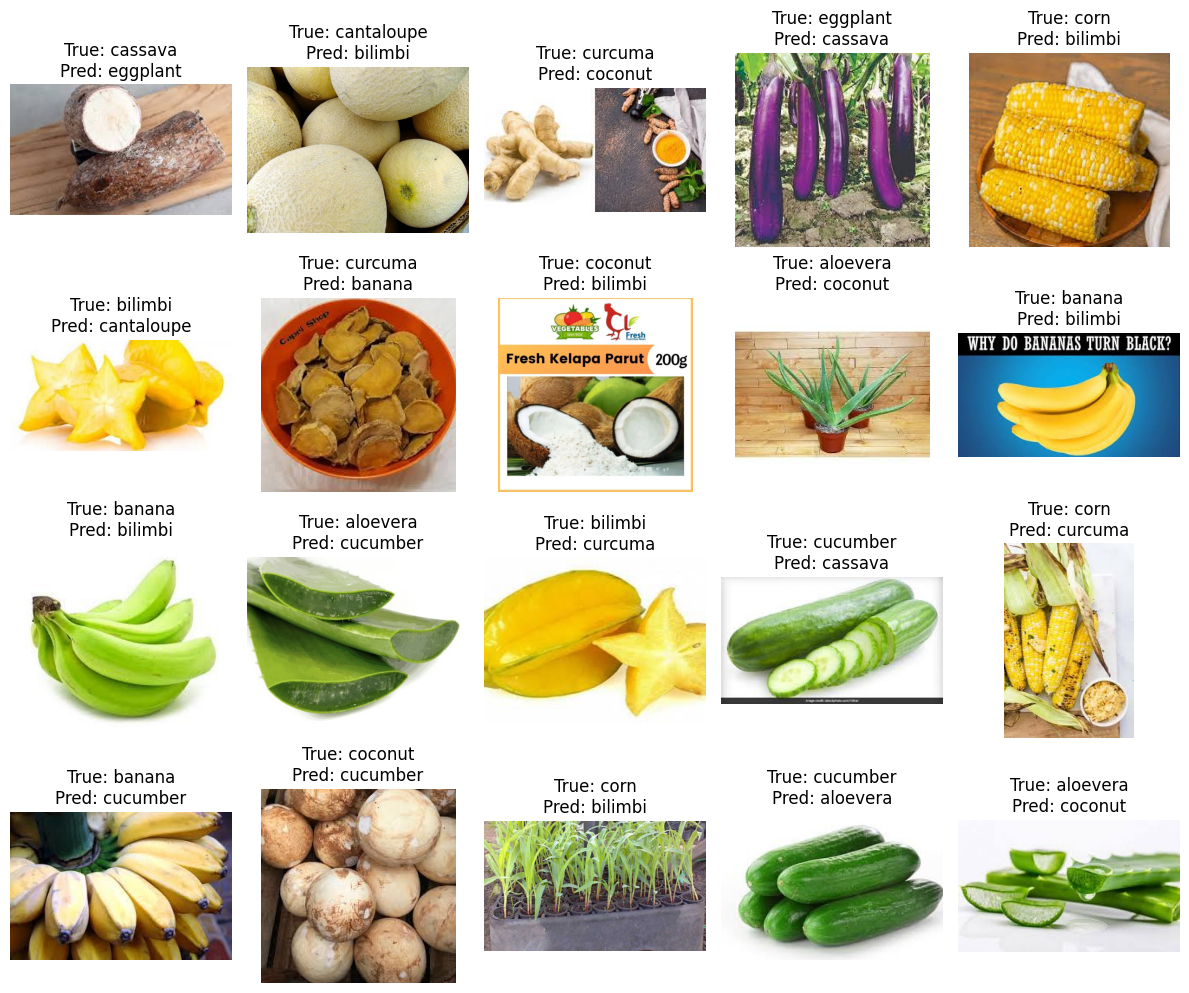

In [6]:
import numpy as np
from PIL import Image

num_pic = 20
nn_model1.test(x_test,y_test)
class_dirs = ['aloevera','banana','bilimbi','cantaloupe','cassava','coconut','corn','cucumber','curcuma','eggplant']


y_pred = nn_model1.forward(Tensor(x_test))
y_pred = np.argmax(y_pred.data.T, 0)
y_true = np.argmax(y_test.T, 0)

incorrect_indices = np.where(y_pred != y_true)[0]
if len(incorrect_indices) > 0:
    selected_indices = np.random.choice(incorrect_indices, size=min(num_pic, len(incorrect_indices)), replace=False)

    fig, axes = plt.subplots(4, 5, figsize=(12, 10))
    axes = axes.ravel()
    
    for i in range(num_pic):
        if i < len(selected_indices):
            idx = selected_indices[i]
            
            # Tạo đường dẫn ảnh
            index = idx%200 + 800
            if idx >= 1397:
                index = index + 1
                if index == 1000:
                    index = 800
            image_path = f"dataset/test/{class_dirs[y_true[idx]]}/{class_dirs[y_true[idx]]}{index}.jpg"
            
            try:
                img = Image.open(image_path)
                axes[i].imshow(img)
                axes[i].set_title(f"True: {class_dirs[y_true[idx]]}\nPred: {class_dirs[y_pred[idx]]}")
                axes[i].axis('off')
            except FileNotFoundError:
                print(f"Image not found at path: {image_path}")
                axes[i].axis('off')
        else:
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No incorrect predictions.")

epochs: 0 loss train: 12.451726409274665 Accuracy train: 0.09685714285714286 loss val: 12.276851050666886 Accuracy validation:  0.109
epochs: 100 loss train: 10.61254227928495 Accuracy train: 0.22471428571428573 loss val: 10.97801858380039 Accuracy validation:  0.196
epochs: 200 loss train: 9.946802018503817 Accuracy train: 0.2664285714285714 loss val: 10.481421950978708 Accuracy validation:  0.234
epochs: 300 loss train: 9.483411654551526 Accuracy train: 0.2985714285714286 loss val: 10.159272223107926 Accuracy validation:  0.255
epochs: 400 loss train: 9.125048788691304 Accuracy train: 0.32142857142857145 loss val: 9.76918423996372 Accuracy validation:  0.277
epochs: 500 loss train: 8.82622695880188 Accuracy train: 0.3442857142857143 loss val: 9.564284587419833 Accuracy validation:  0.296
epochs: 600 loss train: 8.644717018770057 Accuracy train: 0.35528571428571426 loss val: 9.372141573241922 Accuracy validation:  0.308
epochs: 700 loss train: 8.495439361734624 Accuracy train: 0.36542

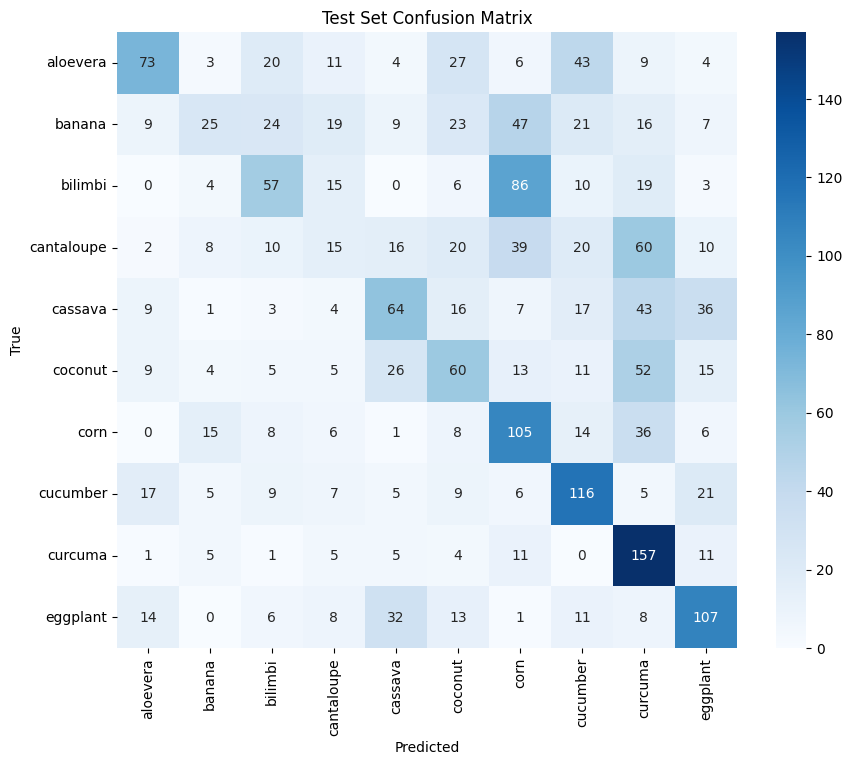

In [8]:
from MLP_autograd import *
nn_model3 = NeuralNetwork(layers_size=[32*32*3,768, 10],activations = ["relu", "softmax"],lossFunction = "crossEntropy", l_rate=0.001)
nn_model3.train(x_train, y_train,x_validation, y_validation, epochs=4001,batch_size = 128)
nn_model3.test(x_test,y_test)

( 7.985144921489449 0.38969484742371185 )


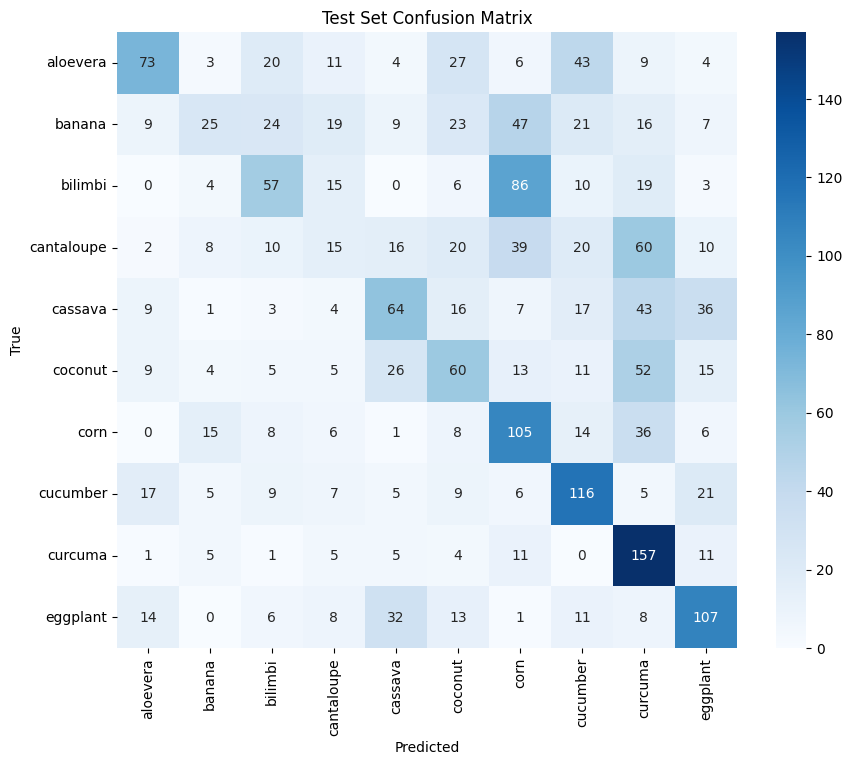

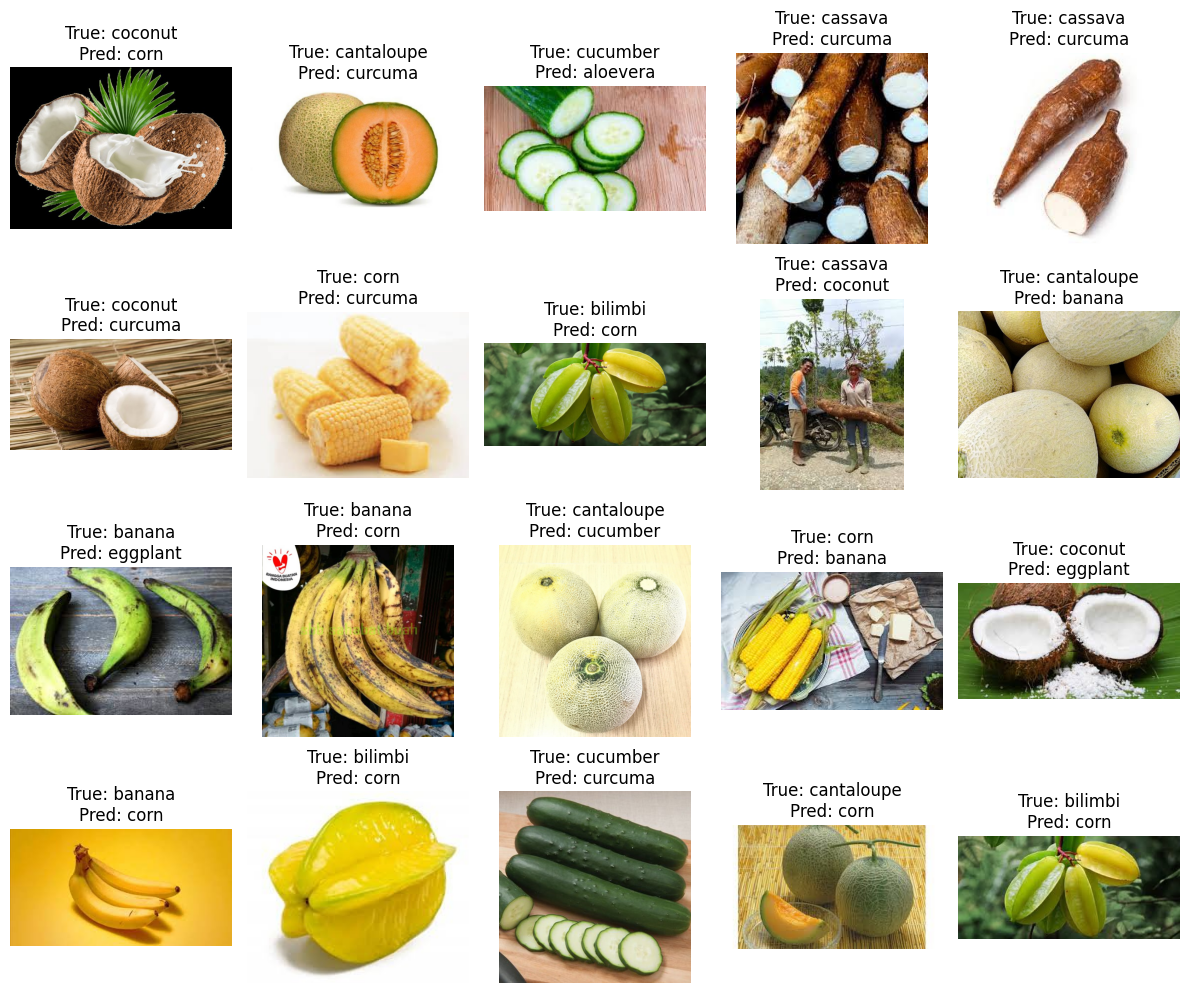

In [12]:
import numpy as np
from PIL import Image

num_pic = 20
nn_model3.test(x_test,y_test)
class_dirs = ['aloevera','banana','bilimbi','cantaloupe','cassava','coconut','corn','cucumber','curcuma','eggplant']


y_pred = nn_model3.forward(Tensor(x_test))
y_pred = np.argmax(y_pred.data.T, 0)
y_true = np.argmax(y_test.T, 0)

incorrect_indices = np.where(y_pred != y_true)[0]
if len(incorrect_indices) > 0:
    selected_indices = np.random.choice(incorrect_indices, size=min(num_pic, len(incorrect_indices)), replace=False)

    fig, axes = plt.subplots(4, 5, figsize=(12, 10))
    axes = axes.ravel()
    
    for i in range(num_pic):
        if i < len(selected_indices):
            idx = selected_indices[i]
            
            # Tạo đường dẫn ảnh
            index = idx%200 + 800
            if idx >= 1397:
                index = index + 1
                if index == 1000:
                    index = 800
            image_path = f"dataset/test/{class_dirs[y_true[idx]]}/{class_dirs[y_true[idx]]}{index}.jpg"
            
            try:
                img = Image.open(image_path)
                axes[i].imshow(img)
                axes[i].set_title(f"True: {class_dirs[y_true[idx]]}\nPred: {class_dirs[y_pred[idx]]}")
                axes[i].axis('off')
            except FileNotFoundError:
                print(f"Image not found at path: {image_path}")
                axes[i].axis('off')
        else:
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No incorrect predictions.")

In [14]:
from MLP_autograd import *
nn1 = NeuralNetwork(layers_size=[32*32*3,768],activations = ["relu"],lossFunction = "crossEntropy", l_rate=0.01)
nn2 = NeuralNetwork(layers_size=[32*32*3,768,768],activations = ["relu", "relu"],lossFunction = "crossEntropy", l_rate=0.01)
nn = NeuralNetwork(layers_size=[768, 10],activations = ["softmax"],lossFunction = "crossEntropy", l_rate=0.01)
def train(x_train,y_train,x_val, y_val, epochs,nn1,nn2,nn,batch_size =128):
    for i in range(epochs):
      for j in range(0,x_train.shape[0],batch_size):
        x_train_batch = Tensor(x_train[j:j+batch_size,:], requires_grad=True)
        y_train_batch = y_train[j:j+batch_size,:]
        
        out1 = nn1.forward(x_train_batch)
        out2 = nn2.forward(x_train_batch)
        out = nn.forward(out1+out2)
        
        out.backward(y_train_batch)

        nn.update_parameter()
        nn1.update_parameter()
        nn2. update_parameter()

      if i % 1 == 0:
        (loss_train, accuracy_train) = test(x_train,y_train, nn1, nn2, nn)
        (loss_val, accuracy_val) = test(x_val,y_val, nn1, nn2, nn)
        print("epochs:", i, "loss train:", loss_train, "Accuracy train:", accuracy_train,
              "loss val:", loss_val, "Accuracy validation: ", accuracy_val)


def test(val_in, val_out, nn1, nn2, nn):
    val_in = Tensor(val_in, requires_grad= True)
    out1 = nn1.forward(val_in)
    out2 = nn2.forward(val_in)
    out = nn.forward(out1+out2)
    loss = np.mean(nn.cost(val_out, nn.lossFunction))
    return (loss, nn.get_accuracy(np.argmax(nn.A[-1].data.T, 0), np.argmax(val_out.T, 0)))
train(x_train,y_train,x_validation, y_validation, 1001 ,nn1,nn2,nn, batch_size =128)
test(x_test,y_test,nn1,nn2,nn)